# Machine Learning Pipeline

### A. Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('./diabetes_dataset_with_notes.csv')
df.head()

### B. Perform Data Pre-processing

#### i. Perform Basic Data Exploration such as (10pts)

In [ ]:
# 1. View the first few rows
df.head()

In [ ]:
# 2. Check for missing values
df.isna().sum()

In [ ]:
# 3. Summary statistics of numerical features
df.describe()

In [ ]:
# 4. Check Data Types
df.dtypes

In [ ]:
# Count of diabetic and non-diabetic cases
df['diabetes'].value_counts()

#### ii. The dataset contains categorical attributes, encode them using Label Encoding (5 pts)

In [ ]:
# Store the categorical columns in an array
categorical_cols = ['location' ,'gender','smoking_history']
# Copy the original data (df) to not mess/change it up
df_encoded = df.copy()
# Dictionary to store encoders
label_encoders = {}

# This will encode the categorical data into (0,1) and will be placed into  a new column (name_encoded) to not mess up the original ones and we can have a reference
for col in categorical_cols:
  le = LabelEncoder()
  df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
  label_encoders[col] = le

df_encoded.head()
# data['location'].unique()

#### iii. Perform data visualization (15 pts)

1. Plot the Class Distribution

In [ ]:
non_diabetic_count = df_encoded['diabetes'].value_counts().get(0,0)
diabetic_count = df_encoded['diabetes'].value_counts().get(1,0)

# Creating the diabetes distribution plot using Seaborn's countplot
plt.figure(figsize=(10, 6))  # Setting the (width, height) of the graph

# We are now using the encoded version of the dataset (refer above)
sns.countplot(x='diabetes', data=df_encoded, palette='Set2', hue="gender_encoded")  # Plot with Seaborn (x is the attribute, df_encoded is the df_encoded from pandas, palette is the color scheme hue os the second variable)

# Some added customization with Matplotlib
plt.title('Class Distribution of Diabetes based on Gender', fontsize=14) # The title of the graph
plt.xlabel('Diabetes Status (Left = No, Right = Yes)', fontsize=14) # The bottom label (x-axis/horizontal)
plt.ylabel('Count', fontsize=14) # The left side label (y-axis/vertical)
plt.xticks(ticks=[0,1], labels=[f'Non-Diabetic Total: {non_diabetic_count}', f'Diabetic total: {diabetic_count}'], fontsize=12) #

plt.legend(title='Gender', labels=['Female', 'Male', 'Other'], fontsize=12, title_fontsize=14) # Some Customization of the legend part

plt.show()

2. Visualize Feature Correlations

In [ ]:
#  Get all the numerical values and store it in an array (I will use the encoded version for this)
numerical_cols = ['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 
                  'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi', 
                  'hbA1c_level', 'blood_glucose_level', 'diabetes', 'location_encoded', 
                  'gender_encoded', 'smoking_history_encoded']

numerical_df = df_encoded[numerical_cols]

corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, 
            fmt='.2f', linewidths=0.5, square=True)

plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for readability
plt.yticks(fontsize=12)

# Step 5: Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

3. Boxplot to Check Outliers

In [ ]:
# Step 1: Select continuous numerical columns
continuous_cols = ['year', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Step 2: Set Seaborn style
sns.set_style("whitegrid")

# Step 3: Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))  # 1 row, 5 columns

# Step 4: Plot each feature in its own subplot
for i, col in enumerate(continuous_cols):
    sns.boxplot(y=df_encoded[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel('')  # Remove y-label for simplicity

# Step 5: Customize and display
plt.suptitle('Boxplots to Check Outliers in Continuous Features', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### C. Perform Feature Selection. 
There are 17 attributes in the dataset. Drop those unnecessary columns. And extract 10 attributes only. Make justification why you choose those 10 attributes. (10pts)

In [ ]:
# Step 1: Define the 10 selected attributes
selected_cols = ['age', 'gender_encoded', 'location_encoded', 'hypertension', 
                 'heart_disease', 'smoking_history_encoded', 'bmi', 'hbA1c_level', 
                 'blood_glucose_level', 'diabetes']

# Step 2: Create a new DataFrame with only the selected columns
data_selected = df_encoded[selected_cols]

# Step 3: Verify the result
display(data_selected)
## Justification Summary
# Clinical Relevance: bmi, hbA1c_level, blood_glucose_level are direct diabetes indicators; hypertension, heart_disease, smoking_history_encoded are risk factors.
# Demographic Insight: age, gender_encoded, location_encoded capture patient context with moderate predictive value.
# Target: diabetes is essential as the outcome.
# Dropped: Race columns are redundant and less impactful; year and clinical_notes lack immediate usability without further processing.

### D. Do a hold-out method

Split the data into training and test dataset. Identify the features and the target , then split into training and testing sets. Read about the ideal ratio of splitting your dataset. (5pts)

In [ ]:
# Step 1: Identify features (X) and target (y)
X = data_selected.drop('diabetes', axis=1)  # Features: all columns except 'diabetes'
y = data_selected['diabetes']               # Target: 'diabetes'

# Step 2: Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Verify the split
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Test target shape (y_test):", y_test.shape)

# (Optional) Peek at the data
print("\nFirst few rows of X_train:")
print(X_train.head())
print("\nFirst few rows of y_train:")
print(y_train.head())

### E. Build the following models

1. Decision Tree

In [ ]:
# i. Decision Tree
from sklearn.linear_model import LogisticRegression


dt_model = DecisionTreeClassifier(random_state=42)

# ii. Naïve Bayes (Gaussian, suitable for continuous features)
nb_model = GaussianNB()

# iii. KNN (K=5 as a starting point)
knn_model = KNeighborsClassifier(n_neighbors=5)

# iv. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence

# Step 2: Train the models
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Step 4: (Optional) Print a sample of predictions to verify
print("Sample Predictions (first 5):")
print("Decision Tree:", dt_predictions[:5])
print("Naïve Bayes:", nb_predictions[:5])
print("KNN:", knn_predictions[:5])
print("Logistic Regression:", lr_predictions[:5])

### F. Model Evaluation
Display the confusion matrix of each model. (20pts)

In [ ]:
# Step 1: Calculate confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

# Step 2: Set up subplots for all four confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid
model_names = ['Decision Tree', 'Naïve Bayes', 'KNN', 'Logistic Regression']
cms = [dt_cm, nb_cm, knn_cm, lr_cm]

# Step 3: Plot each confusion matrix
for i, (cm, ax, name) in enumerate(zip(cms, axes.flatten(), model_names)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                xticklabels=['No Diabetes', 'Diabetes'], 
                yticklabels=['No Diabetes', 'Diabetes'])
    ax.set_title(f'Confusion Matrix: {name}', fontsize=14)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)

# Step 4: Adjust layout and display
plt.tight_layout()
plt.show()

### G. And display a comparison in terms of Accuracy, Precision, Recall, F1-score of each model. (20 pts)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
0        Decision Tree   0.95095   0.697268  0.749266  0.722332
1          Naïve Bayes   0.90540   0.461031  0.656489  0.541667
2                  KNN   0.94700   0.846818  0.460951  0.596958
3  Logistic Regression   0.96065   0.876026  0.626541  0.730572

Formatted Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-score
0        Decision Tree     0.951      0.697   0.749     0.722
1          Naïve Bayes     0.905      0.461   0.656     0.542
2                  KNN     0.947      0.847   0.461     0.597
3  Logistic Regression     0.961      0.876   0.627     0.731


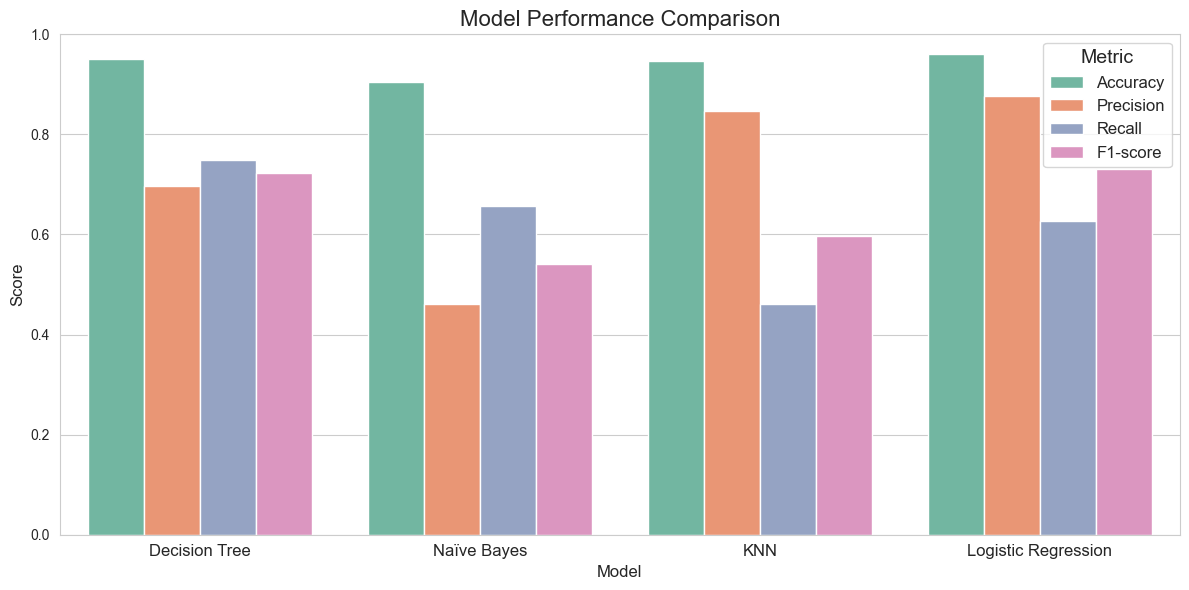

In [20]:
# Step 1: Calculate metrics for each model
from sklearn.metrics import f1_score, precision_score, recall_score


models = {
    'Decision Tree': dt_predictions,
    'Naïve Bayes': nb_predictions,
    'KNN': knn_predictions,
    'Logistic Regression': lr_predictions
}

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

for model_name, predictions in models.items():
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    metrics['Precision'].append(precision_score(y_test, predictions))
    metrics['Recall'].append(recall_score(y_test, predictions))
    metrics['F1-score'].append(f1_score(y_test, predictions))

# Step 2: Create a DataFrame for comparison
metrics_df = pd.DataFrame(metrics)

# Step 3: Display the table
print("Model Performance Comparison:")
print(metrics_df)

# (Optional) Format for better readability
metrics_df_formatted = metrics_df.round(3)  # Round to 3 decimal places
print("\nFormatted Model Performance Comparison:")
print(metrics_df_formatted)

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars=['Model'], 
                                value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                                var_name='Metric', value_name='Score')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='Set2')

# Customize the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend(title='Metric', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()